**Name : Sayali Janardan Patil**

**Task 3 : Number Recognition**

Importing the Libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [52]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [53]:
len(x_train)

60000

In [54]:
len(x_test)

10000

Training set : 60000

Testing set  : 10000

In [55]:
x_train[0].shape

(28, 28)

In [56]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [57]:
print('Y_Train : ',np.unique(y_train))
print('Y_Test : ',np.unique(y_test))

Y_Train :  [0 1 2 3 4 5 6 7 8 9]
Y_Test :  [0 1 2 3 4 5 6 7 8 9]


1st Image :

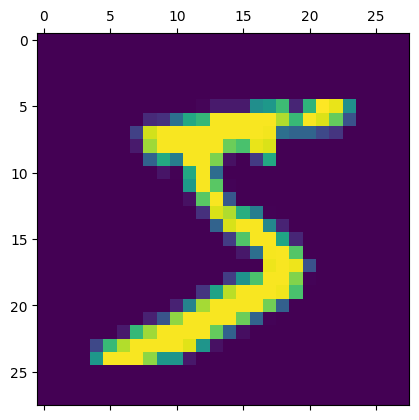

In [58]:
plt.matshow(x_train[0])

Corresponding Digit :

In [59]:
y_train[0]

5

In [60]:
x_train.shape

(60000, 28, 28)

Scaling the Data :

In [61]:
x_train=x_train/255
x_test=x_test/255

In [62]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Building the Neural Network :

Without Hidden Layer :

In [63]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [64]:
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4697 - accuracy: 0.8785
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2531 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [66]:
accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.2679 - accuracy: 0.9255
[0.26788264513015747, 0.9254999756813049]


Using Hidden Layer :

In [67]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #hidden layer
    keras.layers.Dense(10,activation='sigmoid')])


In [68]:
model2.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2722 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1240 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0857 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [70]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9794


[0.0734906941652298, 0.9793999791145325]

So, The model has highest accuracy with using hidden layer.

Accuracy : 97%

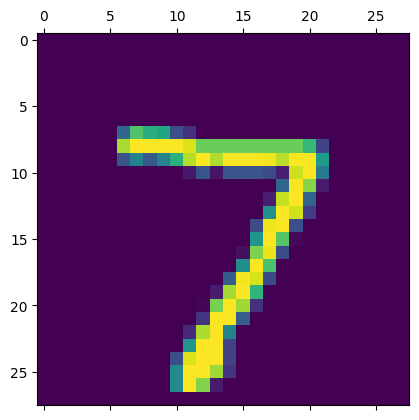

In [71]:
plt.matshow(x_test[0])

In [72]:
y_pred=model2.predict(x_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([5.9191487e-04, 1.4423409e-05, 2.1269071e-01, 6.3387483e-01,
       2.8435878e-08, 8.0660691e-05, 4.4731410e-11, 9.9999911e-01,
       1.0681440e-02, 6.9409385e-02], dtype=float32)

In [73]:
np.argmax(y_pred[0])

7

In [74]:
y_pred_labels=[np.argmax(i)for i in y_pred]
y_pred_labels[:3]

[7, 2, 1]

In [75]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [76]:
cm=confusion_matrix(labels=y_test,predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

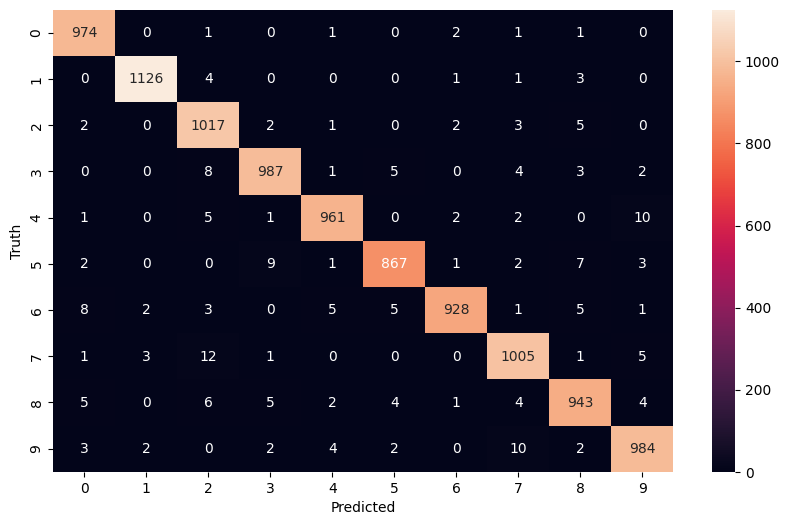

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

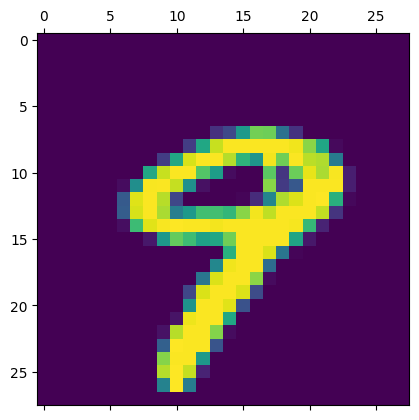

In [78]:
plt.matshow(x_test[9])

In [79]:
np.argmax(y_pred[9])

9

Prediction :

Path of the image to be predicted: /content/Fig1.png


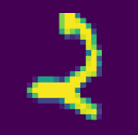

1/1 [==============================] - 0s 51ms/step
The Handwritten Digit is recognised as  2


In [80]:
path = input('Path of the image to be predicted: ')
input_image = cv2.imread(path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: /content/Fig2.jpg


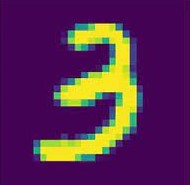

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  3


In [81]:
path = input('Path of the image to be predicted: ')
input_image = cv2.imread(path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

thank you